In [17]:


import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configure API and fetch data
API_KEY = 'A2HN--kvk03HafH8_VkcLXxM7gCDbBoZ'


url = 'https://api.solcast.com.au/radiation/forecasts'  # Updated endpoint
params = {
    'latitude': LATITUDE,
    'longitude': LONGITUDE,
    'api_key': API_KEY,
    'format': 'json'  # Specify format
    'start': start_date.isoformat(),
    'end': end_date.isoformat()

}

response = requests.get(url, params=params)

# Print response status and content
print(f"Status Code: {response.status_code}")
print(f"Response Text: {response.text}")

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")




LATITUDE = -33.865143
LONGITUDE = 151.209900

END_DATE = datetime.now()
START_DATE = END_DATE - timedelta(days=3650)

SyntaxError: invalid syntax (2172470689.py, line 16)

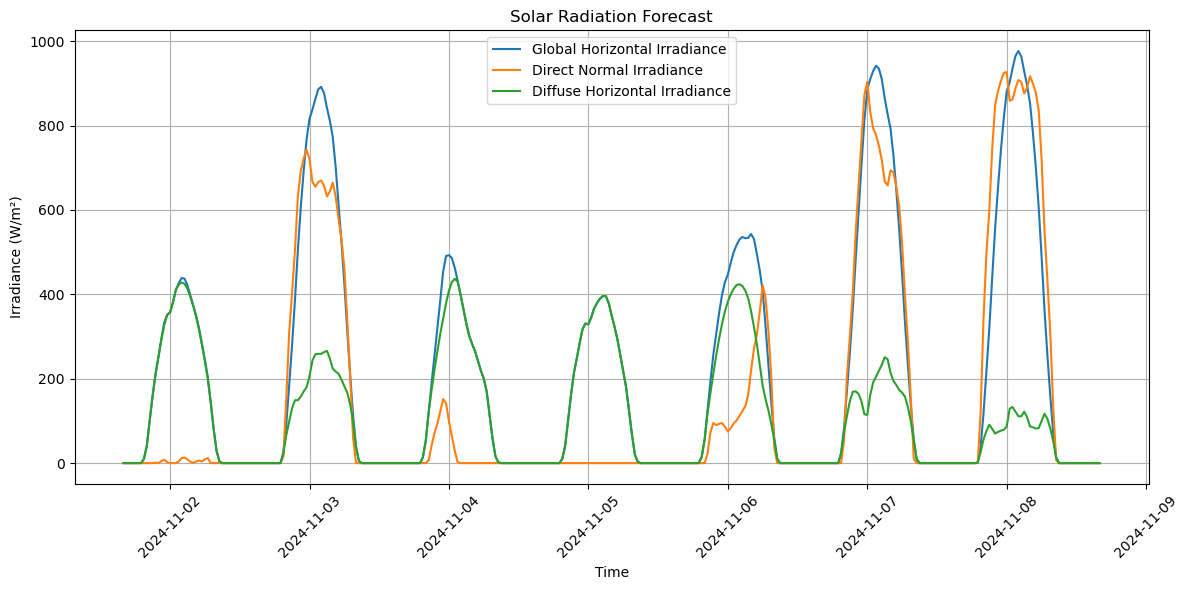


Summary Statistics:
              ghi        ghi90       ghi10         ebh         dni  \
count  337.000000   337.000000  337.000000  337.000000  337.000000   
mean   220.934718   305.362018   85.878338  108.154303  149.554896   
std    284.471359   355.519714  131.673342  221.955192  276.964569   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.000000     0.000000    0.000000    0.000000    0.000000   
50%     52.000000    88.000000   13.000000    0.000000    0.000000   
75%    385.000000   635.000000  125.000000   69.000000  122.000000   
max    977.000000  1015.000000  611.000000  865.000000  927.000000   

            dni10       dni90         dhi    air_temp      zenith     azimuth  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     7.857567  336.640950  112.795252   21.528190   78.928783   -2.626113   
std     35.227879  369.497356  137.103029    4.070064   37.437817  110.342822   
min      0.000000    0.0

In [10]:
df = pd.DataFrame(data['forecasts'])  # Adjust key based on actual response structure
df['period_end'] = pd.to_datetime(df['period_end'])
df.set_index('period_end', inplace=True)

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ghi'], label='Global Horizontal Irradiance')
plt.plot(df.index, df['dni'], label='Direct Normal Irradiance')
plt.plot(df.index, df['dhi'], label='Diffuse Horizontal Irradiance')

plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.title('Solar Radiation Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(df.describe())

In [16]:
len(df)
len(df)/48

7.020833333333333

In [15]:
df.head()

,ghi,ghi90,ghi10,ebh,dni,dni10,dni90,dhi,air_temp,zenith,azimuth,cloud_opacity,period
period_end,,,,,,,,,,,,,
2024-11-01 16:00:00+00:00,0,0,0,0,0,0,0,0,16,123,-143,65,PT30M
2024-11-01 16:30:00+00:00,0,0,0,0,0,0,0,0,16,119,-136,66,PT30M
2024-11-01 17:00:00+00:00,0,0,0,0,0,0,0,0,16,114,-129,68,PT30M
2024-11-01 17:30:00+00:00,0,0,0,0,0,0,0,0,16,109,-124,69,PT30M
2024-11-01 18:00:00+00:00,0,0,0,0,0,0,0,0,16,104,-119,67,PT30M
